# **Analyse Datenempfang der tinkerforge-Sensoren**
___

In [1]:
import datetime as dt
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use(".\src\stylesheets\eb3.mplstyle")
from src.utilities import export
from src.project_definitions import BUID, dir_results, wohnungen
from src.sensor_reader import EM, IND

ex = False

# Moline Sensoren

In [2]:
## preparing data
timemax = max([EM.index.max().date() for bui in BUID])
timemax

datetime.date(2022, 3, 9)

In [3]:
EM.drop(labels='HQ',level=2,axis=1).droplevel(level=2,axis=1).resample('D').count()

MH                                                       \
              N         O         S      KWZ-Gesamt_W_VW OG-Ost_H_VW   
              H    W    H    W    H    W               W           H   
Datetime                                                               
2021-09-02  134  249  240  212  123  215              20          14   
2021-09-03  128  260  237  215  131  204              35          24   
2021-09-04  151  221  257  201  114  262              35           0   
2021-09-05  162  252  211  191  109  242              13           0   
2021-09-06  155  241  236  227  114  222              18          36   
...         ...  ...  ...  ...  ...  ...             ...         ...   
2022-03-05  121  195  198  213   69  221             232           0   
2022-03-06  129  179  186  236   77  217             246           0   
2022-03-07  127  185  177  228   86  212             203          30   
2022-03-08  105  211  215  217   65  194             210          30   
2022-03-09  105  190  192  194   65  218             193          31   

                             MW  ...                                  LB       \
           WMZ-Gesamt_H_VW    N  ... KWZ-Gesamt_W_VW WMZ-Gesamt_H_VW   N        
                         H    H  ...               W               H   H    W   
Datetime                         ...                                            
2021-09-02             236   62  ...             140             446  33  166   
2021-09-03             225   79  ...              54             482  53  170   
2021-09-04             201  271  ...              87             354   0  146   
2021-09-05             276  103  ...              96             458   0  122   
2021-09-06             207  110  ...              46             462  54  131   
...                    ...  ...  ...             ...             ...  ..  ...   
2022-03-05             210  120  ...             192             237   0  273   
2022-03-06             205  151  ...             205             228   0  266   
2022-03-07             226  163  ...             188             220  49  268   
2022-03-08             218  165  ...             187             261  51  226   
2022-03-09             212  176  ...             210             224  39  222   

                                                                
              O         S      KWZ-Gesamt_W_VW WMZ-Gesamt_H_VW  
              H    W    H    W               W               H  
Datetime                                                        
2021-09-02  246  107  276  278              17             341  
2021-09-03  267   81  301  270              39             275  
2021-09-04  317   71  291  310              48             272  
2021-09-05  248   98  283  311              33             363  
2021-09-06  247   98  235  285              14             391  
...         ...  ...  ...  ...             ...             ...  
2022-03-05  133   48  170  337             133             363  
2022-03-06  159   82  162  325             124             339  
2022-03-07  120   79  172  319             120             329  
2022-03-08  144   57  177  325             171             296  
2022-03-09  100   84  248  283             126             297  

[189 rows x 25 columns]

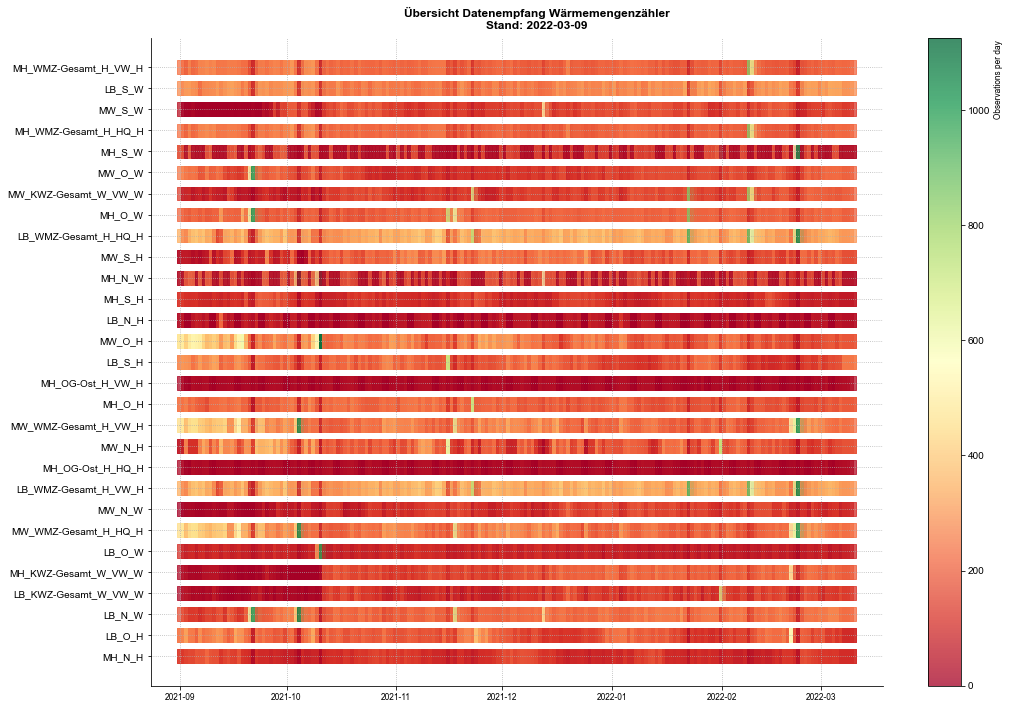

In [4]:
level_values = EM.index.get_level_values
result = EM.resample('D').count()
result = result.droplevel(level=2, axis=1)
result.columns = ['_'.join(col).strip() for col in result.columns.values]
result.T.drop_duplicates(inplace=True)
result = result.unstack().reset_index(level=0)
result.columns = ['meter', 'n_obs']
result = result.sort_index()

## plotting
f, ax = plt.subplots(figsize=(15,10))
ax.plot(result.index, result.meter, linestyle='None')
sc = ax.scatter(result.index, result.meter, c=result.n_obs, s=len(result.index.unique()), alpha=0.75,marker = 's', cmap='RdYlGn')
cbar = f.colorbar(sc)
cbar.set_label("Observations per day ", loc='top')
f.suptitle(f'Übersicht Datenempfang Wärmemengenzähler\nStand: {timemax}')
f.tight_layout()

## **1. Gesamtübersicht pro Raum**
---

C:\Users\Roman\AppData\Local\Temp/ipykernel_21436/865197093.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots()


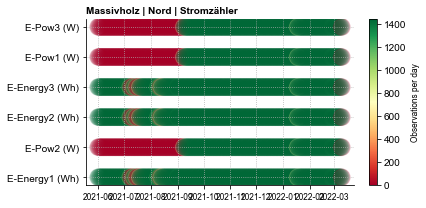

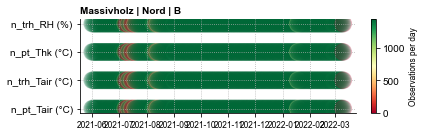

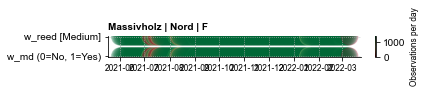

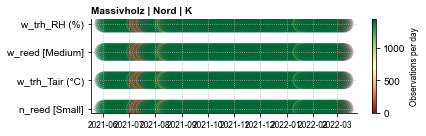

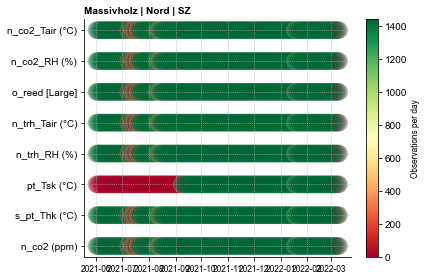

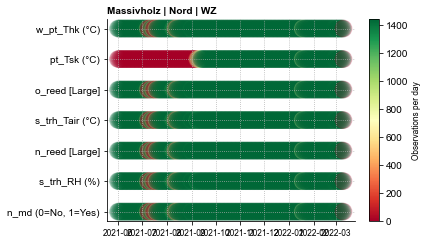

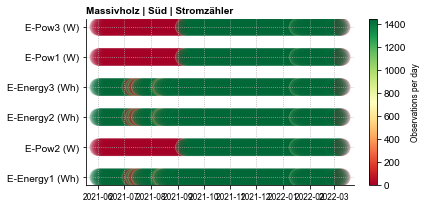

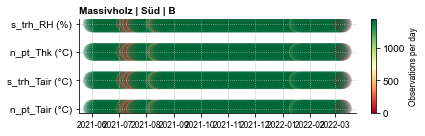

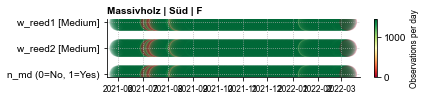

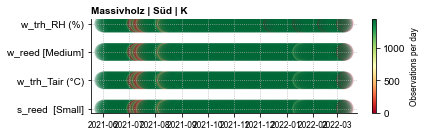

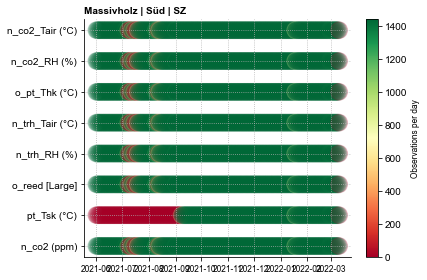

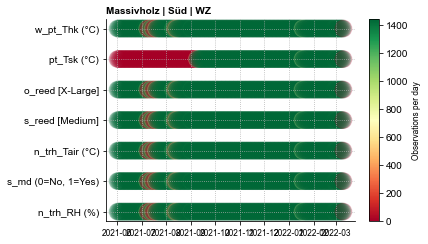

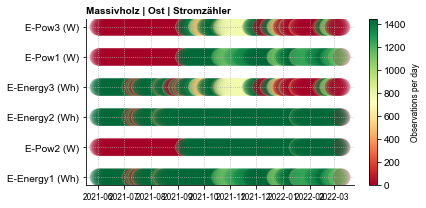

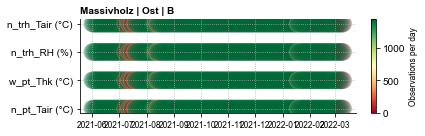

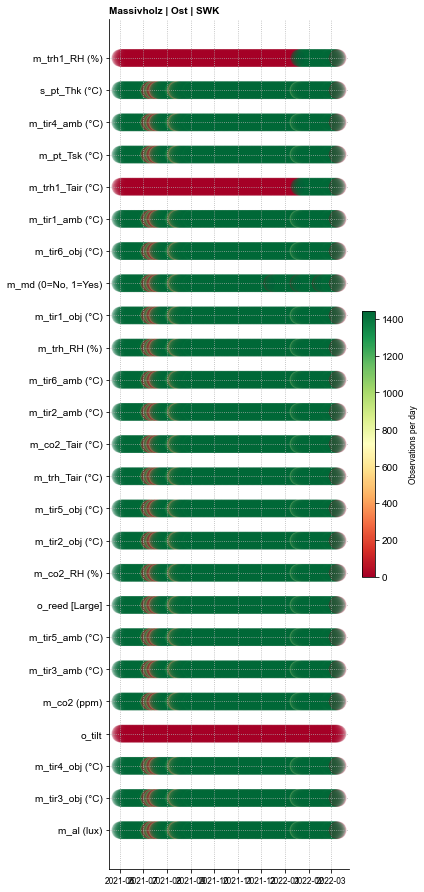

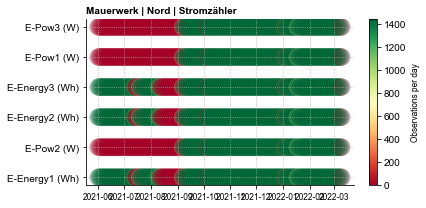

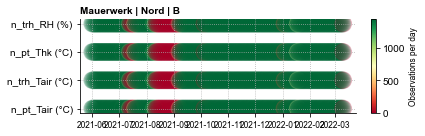

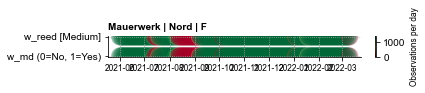

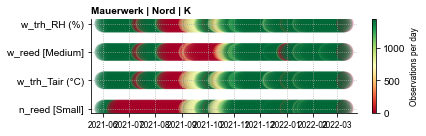

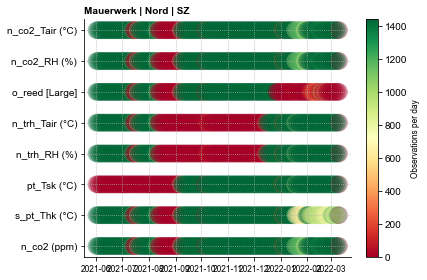

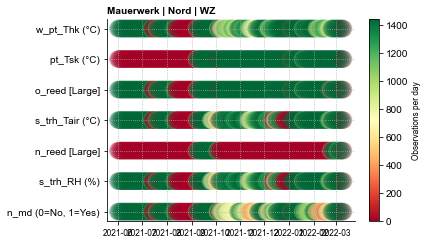

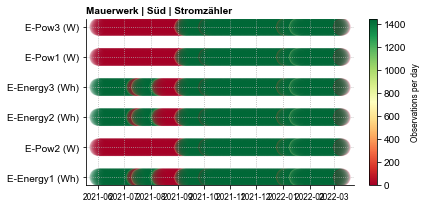

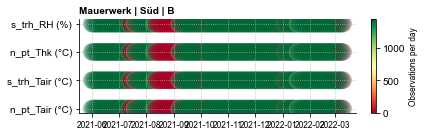

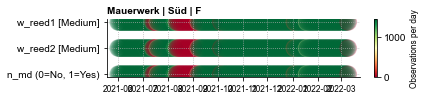

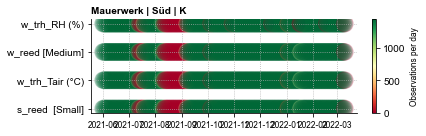

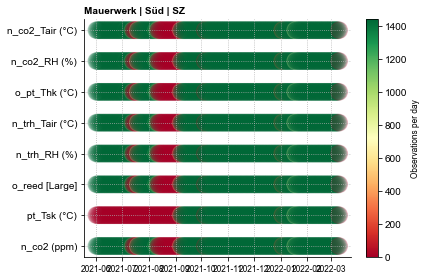

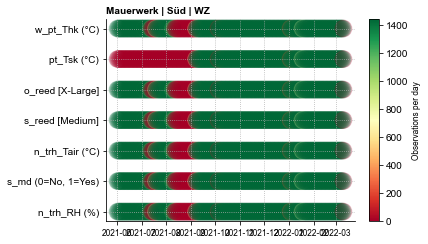

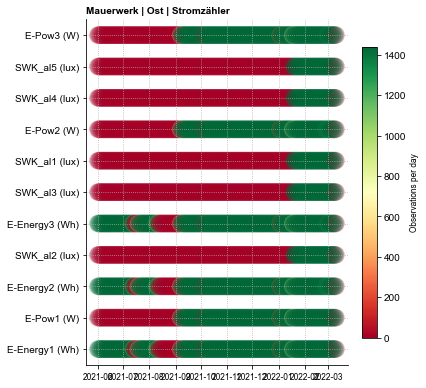

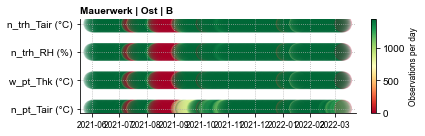

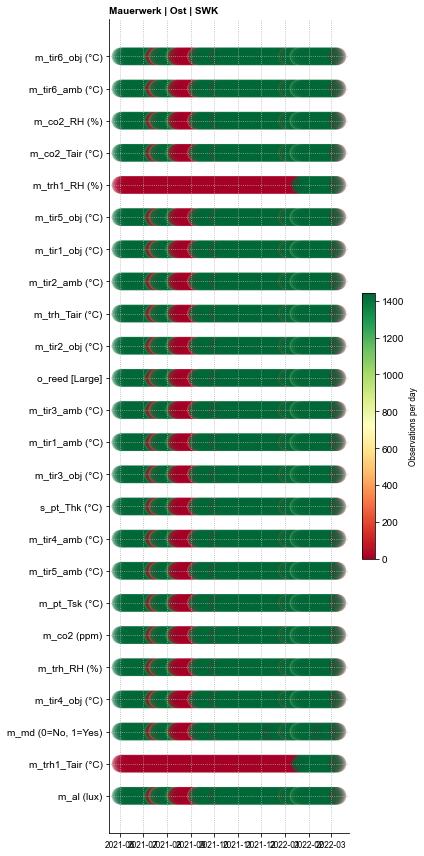

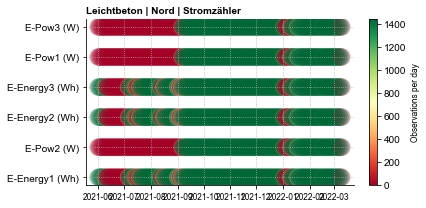

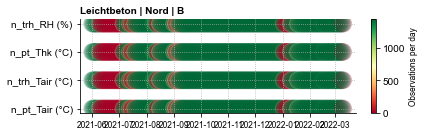

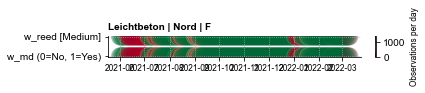

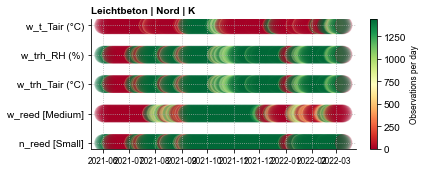

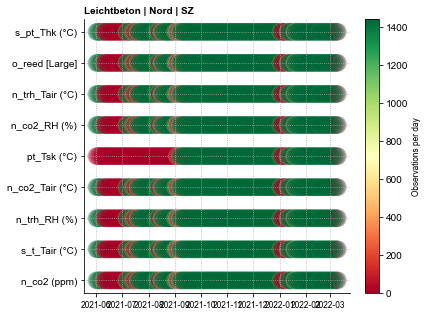

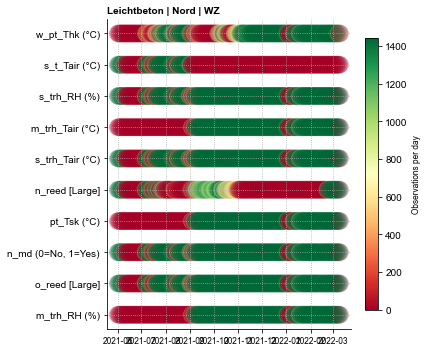

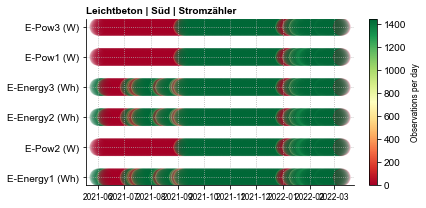

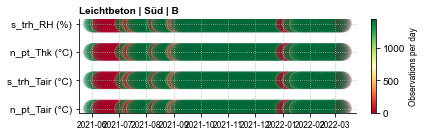

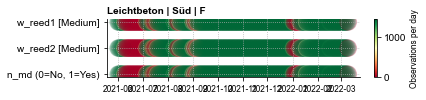

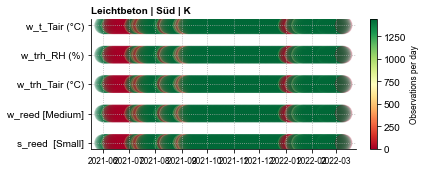

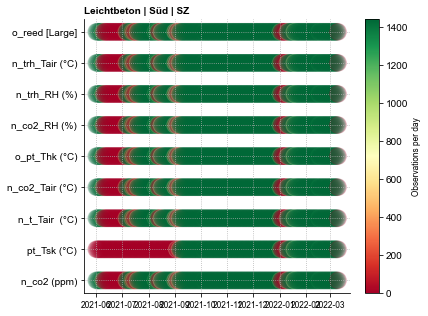

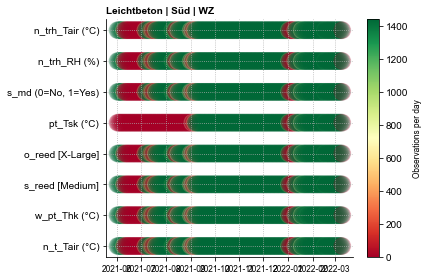

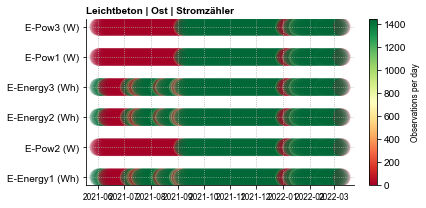

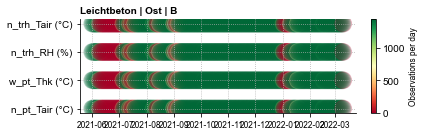

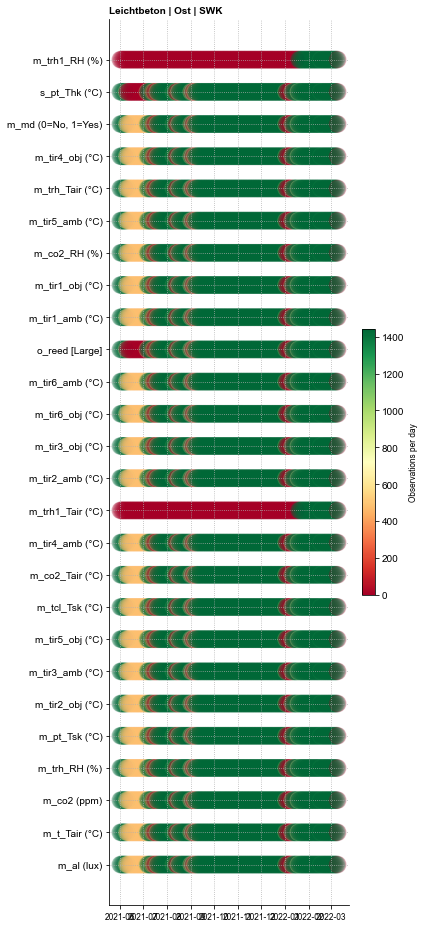

In [5]:
for bui in BUID:
    for app in wohnungen:
        df = IND[bui][app]
        df = df.resample('D').count()
        for name, df in df.groupby(level=0,axis=1):
                if name == '': name = 'Stromzähler'
                fig,ax = plt.subplots()
                ax.set_title(f'{BUID[bui]} | {wohnungen[app]} | {name}')
                df = df.unstack().reset_index().set_index('Datetime')
                df.columns = ['Room','Sensor_ID', 'n_data']
                df = df.sort_values(by='Sensor_ID').sort_index()
                fig.set_figheight(df.Sensor_ID.unique().size*0.5)
                sc = ax.scatter(df.index, df.Sensor_ID, c=df.n_data, s=len(df.index.unique()), alpha=0.2,marker = 'o', cmap='RdYlGn')
                ax.get_xaxis()
                #ax.set_xlim(dt.datetime.now()-dt.timedelta(1000),dt.datetime.now())
                cbar = fig.colorbar(sc,fraction=.05)
                cbar.solids.set(alpha=1)
                cbar.set_label("Observations per day")
                fig.tight_layout()
                if ex:
                    export(fig,filepath=os.path.join(dir_results,'Allgemein','Tinkerforge_Datenaufzeichnung'),filename=f'{bui}_{app}_{name}_Datenempfang', extlist=['pdf'], show=True)

## **2. Detaillierte Übersicht über die letzten 30 Tage**
---

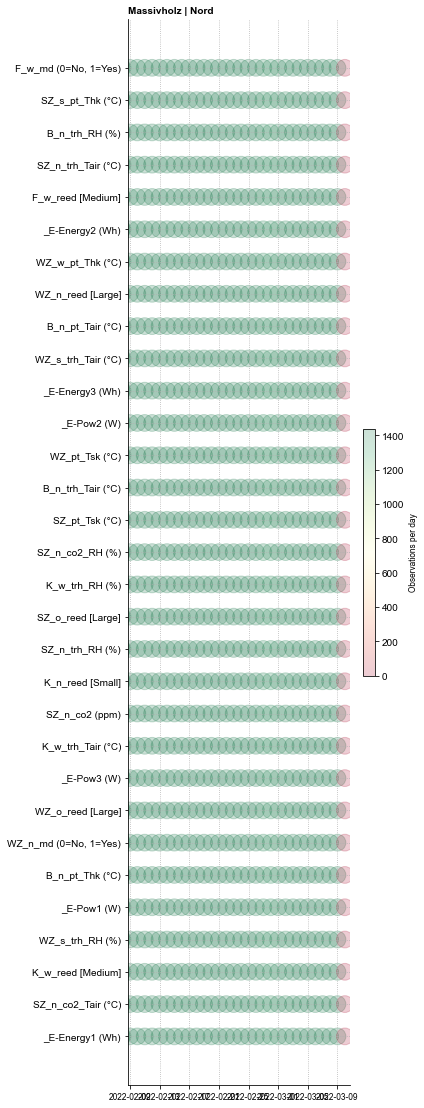

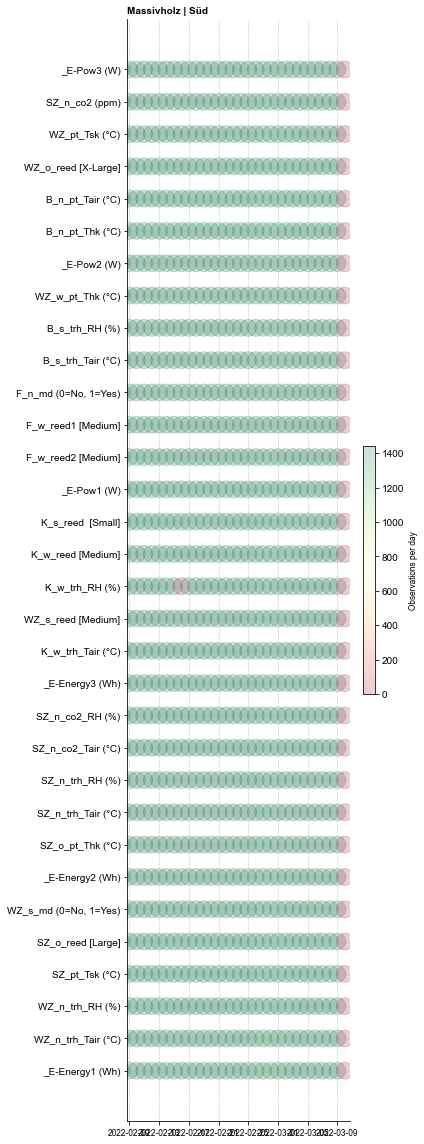

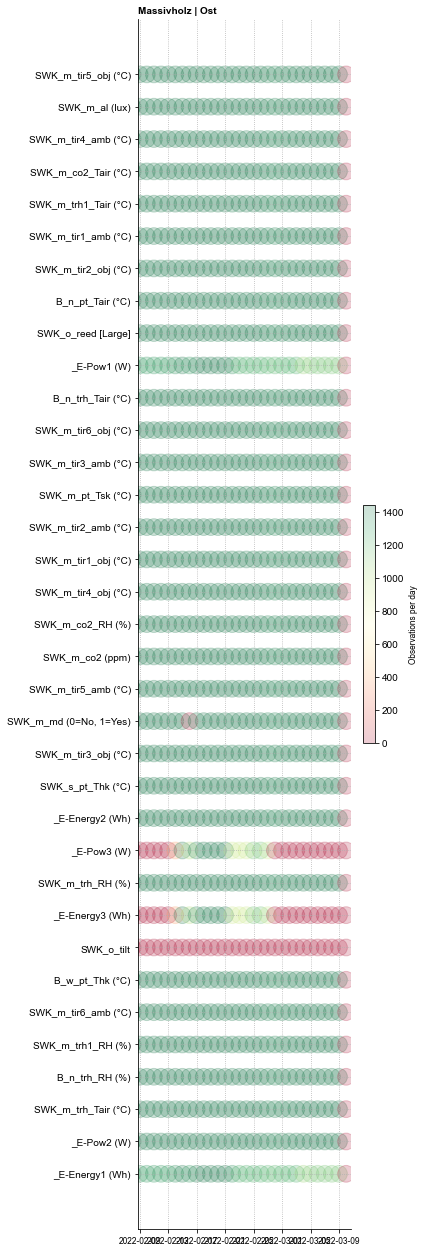

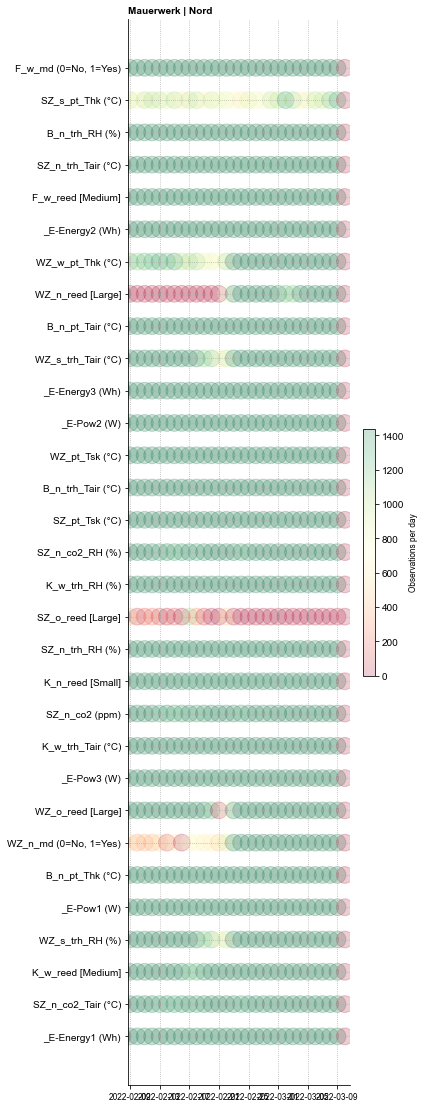

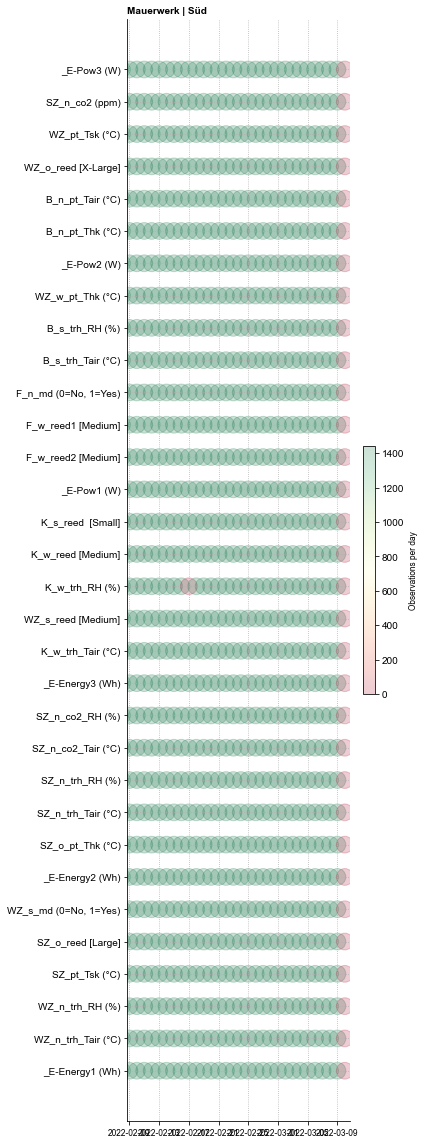

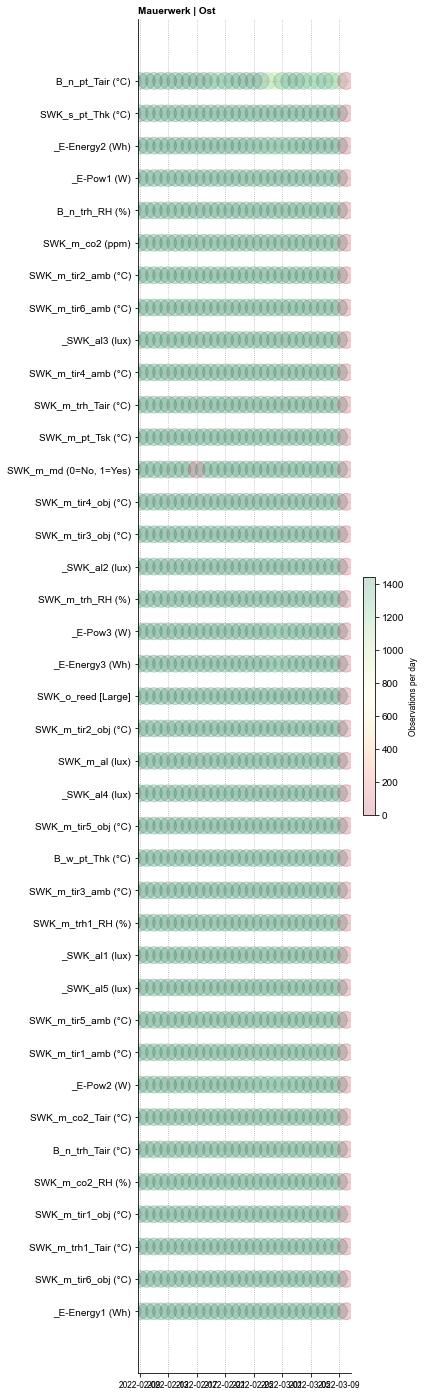

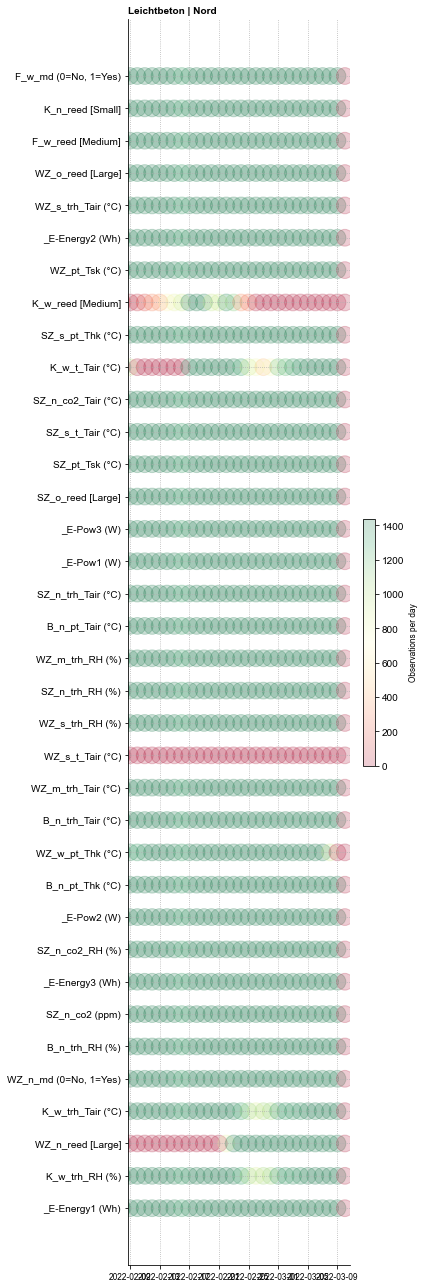

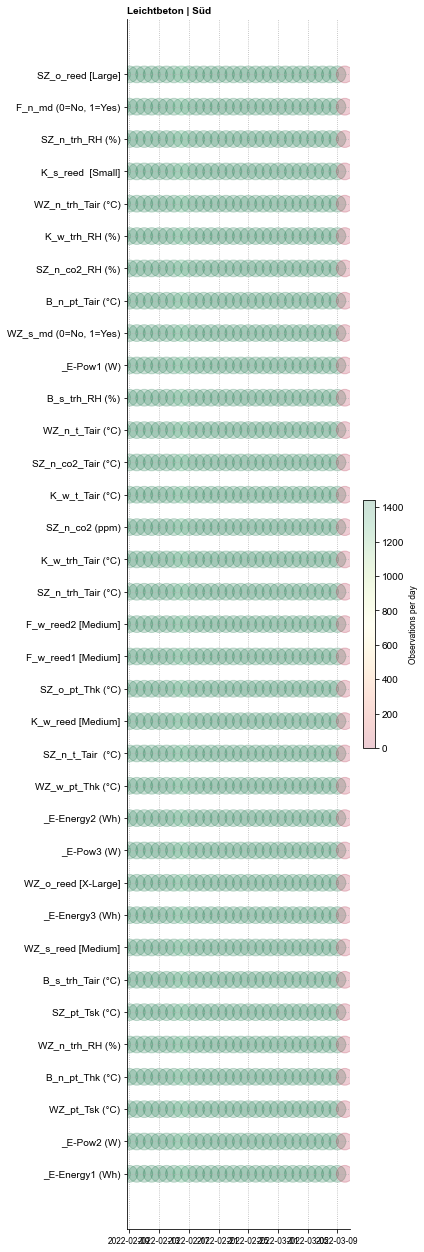

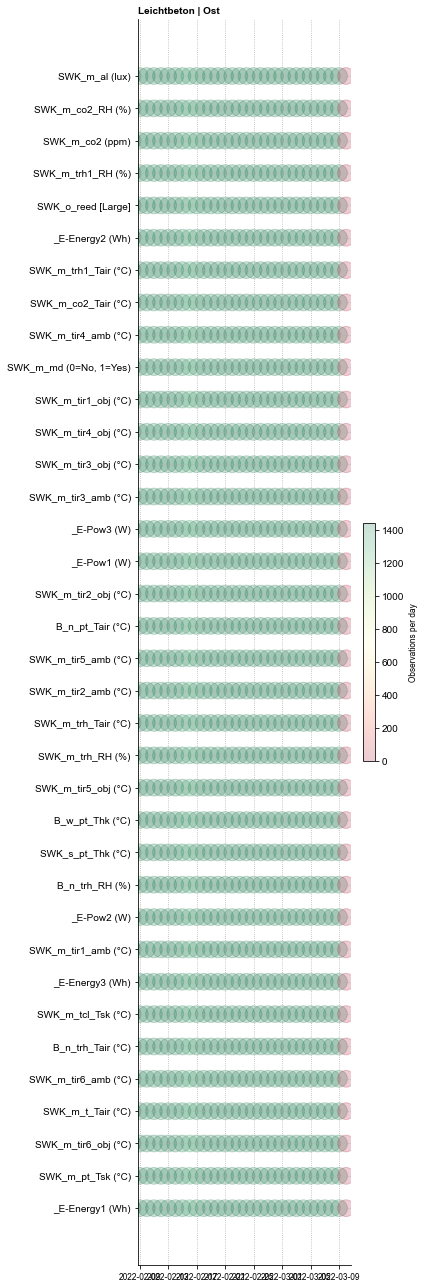

In [6]:
for bui in BUID:
    for app in wohnungen:
        fig,ax = plt.subplots()
        ax.set_title(f'{BUID[bui]} | {wohnungen[app]}')
        df = IND[bui][app].resample('D').count()
        df.columns = ['_'.join(col).strip() for col in df.columns.values]
        df = df.unstack().reset_index(level=0)
        df.columns = ['Sensor_ID', 'n_data']
        df.sort_index(inplace=True)
        fig.set_figheight(df.Sensor_ID.unique().size*0.5)
        sc = ax.scatter(df.index, df.Sensor_ID, c=df.n_data, s=len(df.index.unique()), alpha=0.2,marker = 'o', cmap='RdYlGn')
        ax.set_xlim(dt.datetime.now()-dt.timedelta(30),dt.datetime.now())
        cbar = fig.colorbar(sc,fraction=.05)
        cbar.set_label("Observations per day")
        fig.tight_layout()